# Setup

In [1]:

# import necessary packages
import pandas as pd
import numpy as np
import utils.plot as plot
from utils.plot import evaluation_metric
import seaborn as sns
import matplotlib.pyplot as plt
from utils.model import get_cleaned_data, extract_train, split_train_test, get_valid_categoricals
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, f1_score

In [4]:
#%run utils/model.py

# Explore data

In [68]:
path = "data\kickstarter_projects.csv"
data = get_cleaned_data(path)
df = extract_train(data)
df.head(2)

,id,name,category,subcategory,country,launched,deadline,goal,pledged,backers,state,success
225187,387771284,Godzilla: Heritage Phase 2,Film & Video,Science Fiction,United States,2015-05-23 11:41:50,2015-07-22,40000,19430,125,Failed,0
202568,965222023,How to improve your game - football statistics,Technology,Apps,Denmark,2015-02-19 22:19:48,2015-03-21,14538,0,0,Failed,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279041 entries, 225187 to 121958
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           279041 non-null  int64 
 1   name         279041 non-null  object
 2   category     279041 non-null  object
 3   subcategory  279041 non-null  object
 4   country      279041 non-null  object
 5   launched     279041 non-null  object
 6   deadline     279041 non-null  object
 7   goal         279041 non-null  int64 
 8   pledged      279041 non-null  int64 
 9   backers      279041 non-null  int64 
 10  state        279041 non-null  object
 11  success      279041 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 27.7+ MB


In [70]:
df.describe()

,id,goal,pledged,backers,success
count,2.790410e+05,2.790410e+05,2.790410e+05,279041.000000,279041.000000
mean,1.075134e+09,4.389379e+04,9.165695e+03,106.281113,0.362018
std,6.193611e+08,1.070709e+06,9.572461e+04,890.050811,0.480585
min,5.971000e+03,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,5.380024e+08,2.000000e+03,3.100000e+01,2.000000,0.000000
50%,1.076497e+09,5.500000e+03,6.260000e+02,12.000000,0.000000
75%,1.610976e+09,1.598800e+04,4.070000e+03,57.000000,1.000000
max,2.147472e+09,1.663614e+08,2.033899e+07,219382.000000,1.000000


In [71]:
df.isna().sum()

id             0
name           0
category       0
subcategory    0
country        0
launched       0
deadline       0
goal           0
pledged        0
backers        0
state          0
success        0
dtype: int64

In [72]:
#Check unique values of categorical variables
print("\n\n", df.category.nunique(), "Unique values of Category : \n", pd.DataFrame({'Count': df.category.value_counts(), 'Percentage : ': round(df.category.value_counts(normalize=True)*100,1)}))
print("\n\n", df.subcategory.nunique(), "Unique values of Sub-Category : \n", pd.DataFrame({'Count': df.subcategory.value_counts(), 'Percentage : ': round(df.subcategory.value_counts(normalize=True)*100,1)}))
print("\n\n", df.country.nunique(), "Unique values of Country : \n", pd.DataFrame({'Count': df.country.value_counts(), 'Percentage : ': round(df.country.value_counts(normalize=True)*100,1)}))
print("\n\n", df.state.nunique(), "Unique values of State : \n", pd.DataFrame({'Count': df.state.value_counts(), 'Percentage : ': round(df.state.value_counts(normalize=True)*100,1)}))



 15 Unique values of Category : 
               Count  Percentage : 
category                          
Film & Video  46956           16.8
Music         36717           13.2
Publishing    29364           10.5
Games         26314            9.4
Technology    24120            8.6
Design        22249            8.0
Art           20907            7.5
Food          18217            6.5
Fashion       17055            6.1
Theater        8159            2.9
Comics         8048            2.9
Photography    7968            2.9
Crafts         6590            2.4
Journalism     3558            1.3
Dance          2819            1.0


 159 Unique values of Sub-Category : 
                     Count  Percentage : 
subcategory                             
Product Design      16491            5.9
Documentary         12122            4.3
Tabletop Games      10601            3.8
Music                9864            3.5
Shorts               9343            3.3
Video Games          8836            3.2


In [73]:
# check duplicate names
 
# Count occurrences of each name
name_counts = df['name'].value_counts()

# Create DataFrame from the counts
counts_df = pd.DataFrame({'name': name_counts.index, 'count': name_counts.values})
 
# Sort by descending count and ascending name
sorted_df = counts_df.sort_values(by=['count', 'name'], ascending=[False, True])

# Filter rows with count greater than 1
filtered_df = sorted_df[sorted_df['count'] > 1]

# Create a list to store results
result_data = []

# Loop through each duplicate name
for name in filtered_df['name']:
    # Filter the original DataFrame to get 'launched' and 'state' values for the current name
    name_df = df[df['name'] == name]
    sorted_name_df = name_df.sort_values(by='launched', ascending=True)  # Sort by 'launched' in descending order
    dates_launched = sorted_name_df['launched'].tolist()
    states = sorted_name_df['state'].tolist()
    countries = sorted_name_df['country'].tolist()
    categories = sorted_name_df['category'].tolist()
    goals = sorted_name_df['goal'].tolist()
    # Append the name, count, 'launched', and 'state' values to the result_data list
    result_data.append({'name': name, 'count': filtered_df.loc[filtered_df['name'] == name, 'count'].iloc[0], 'launched': dates_launched, 'states': states, 'countries': countries, 'categories': categories, 'goals': goals})

# Create a DataFrame from the result_data list
result_df = pd.DataFrame(result_data)
print(result_df)
#result_df.to_csv('duplicate_names/duplicate_names.csv', index=False)

                                                   name  count   
0                                   Canceled (Canceled)     10  \
1                                        N/A (Canceled)     10   
2                                           The Journey      9   
3                                  Cancelled (Canceled)      8   
4                                           Music Video      7   
5                              New EP/Music Development      7   
6                                           Reflections      7   
7                             A Midsummer Night's Dream      6   
8                                                 Karma      6   
9                                                 Pizza      6   
10                                        The Awakening      6   
11                                       The Other Side      6   
12                                            Aftermath      5   
13                                                Alone      5   
14        

In [74]:
#We define our categorical and numerical features and our target variables.
target_variable = ['success']
cat_features = ['category', 'subcategory', 'country']
num_features = ['goal', 'pledged', 'backers']

In [75]:
# We describe the continuous data.
df[num_features].describe()

,goal,pledged,backers
count,2.790410e+05,2.790410e+05,279041.000000
mean,4.389379e+04,9.165695e+03,106.281113
std,1.070709e+06,9.572461e+04,890.050811
min,0.000000e+00,0.000000e+00,0.000000
25%,2.000000e+03,3.100000e+01,2.000000
50%,5.500000e+03,6.260000e+02,12.000000
75%,1.598800e+04,4.070000e+03,57.000000
max,1.663614e+08,2.033899e+07,219382.000000


In [76]:
df[cat_features].describe()

,category,subcategory,country
count,279041,279041,279041
unique,15,159,22
top,Film & Video,Product Design,United States
freq,46956,16491,218235


In [77]:
df['success'].value_counts()

success
0    178023
1    101018
Name: count, dtype: int64

In [78]:
# we convert Launched and Deadline to datetime.
df['launched'] = pd.to_datetime(df['launched'])
df['deadline'] = pd.to_datetime(df['deadline'])

In [79]:
#We create a time active column which is the the length of time in days between being Launched and the deadline.
df['time_active'] = (df['deadline'] - df['launched']).dt.days
df['time_active'] = df['time_active'].astype(int)
df['time_active'].describe()

count    279041.000000
mean         33.156593
std          12.790189
min           0.000000
25%          29.000000
50%          29.000000
75%          36.000000
max          91.000000
Name: time_active, dtype: float64

# Visualise data

<Axes: xlabel='state', ylabel='count'>

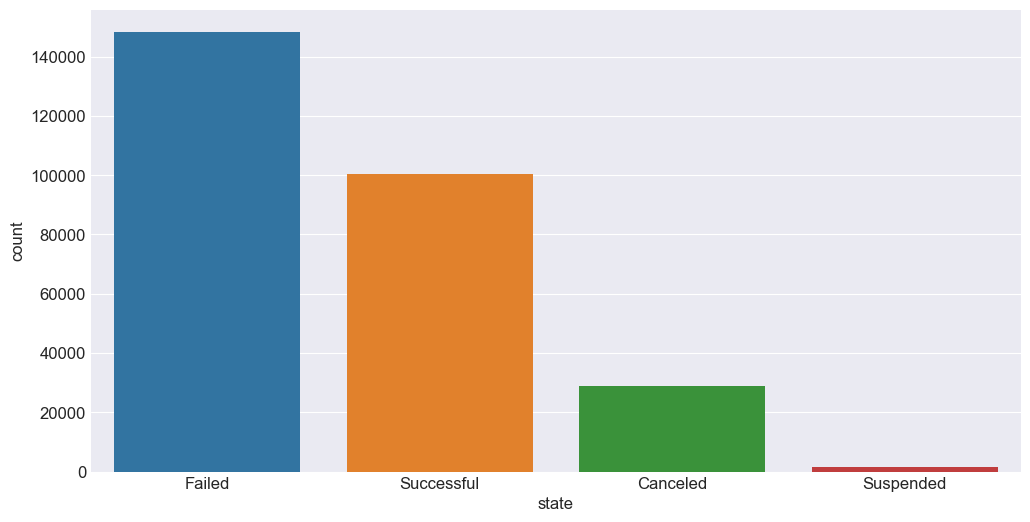

In [80]:
sns.countplot(df, x='state')

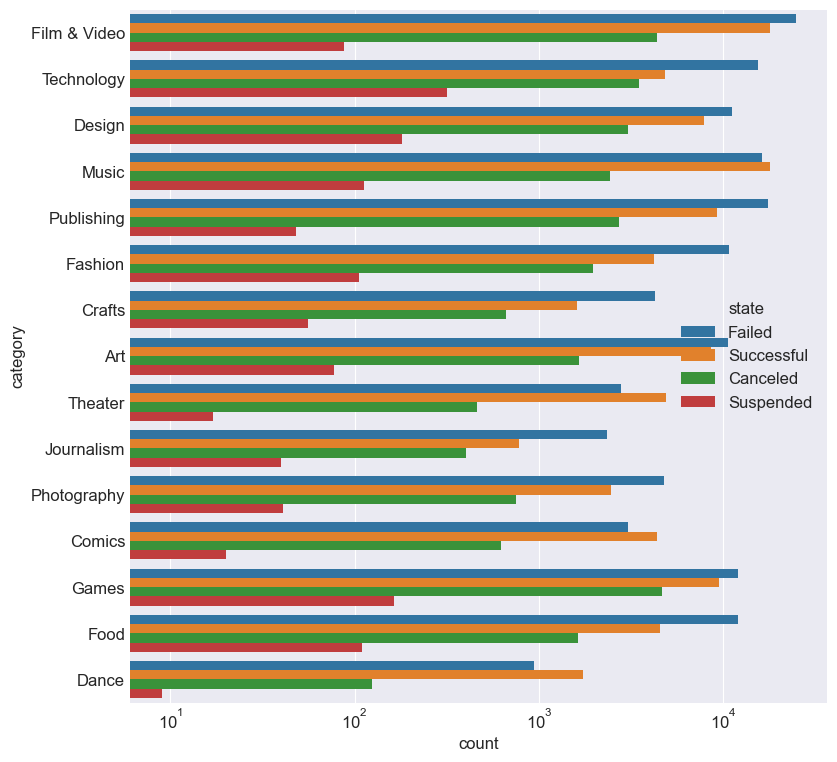

In [82]:
plt.figure(figsize=(9, 9))
sns.countplot(df, y='category', hue='state')
plt.xscale('log')

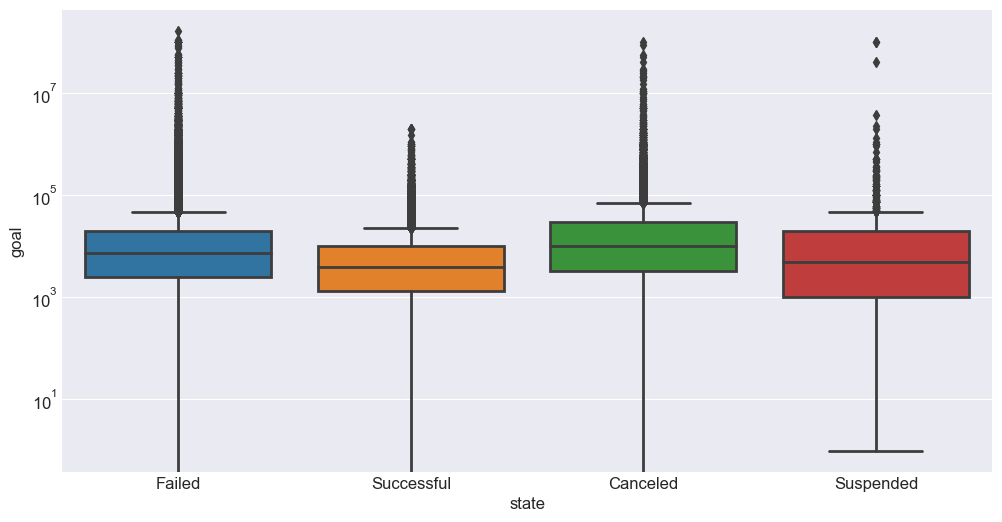

In [84]:
sns.boxplot(df, x='state', y='goal')
plt.yscale('log')

<Axes: xlabel='goal', ylabel='category'>

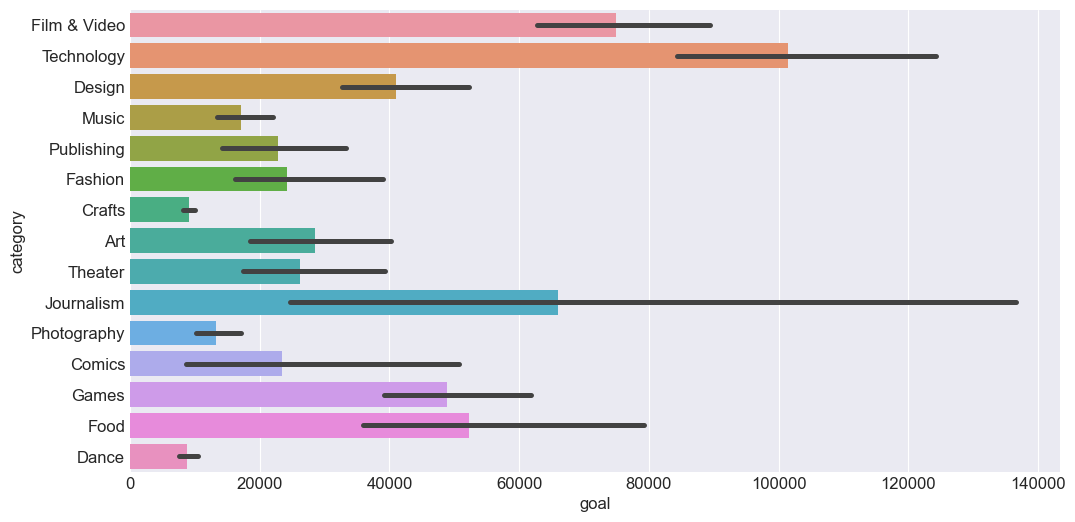

In [85]:
sns.barplot(df, y='category', x='goal')

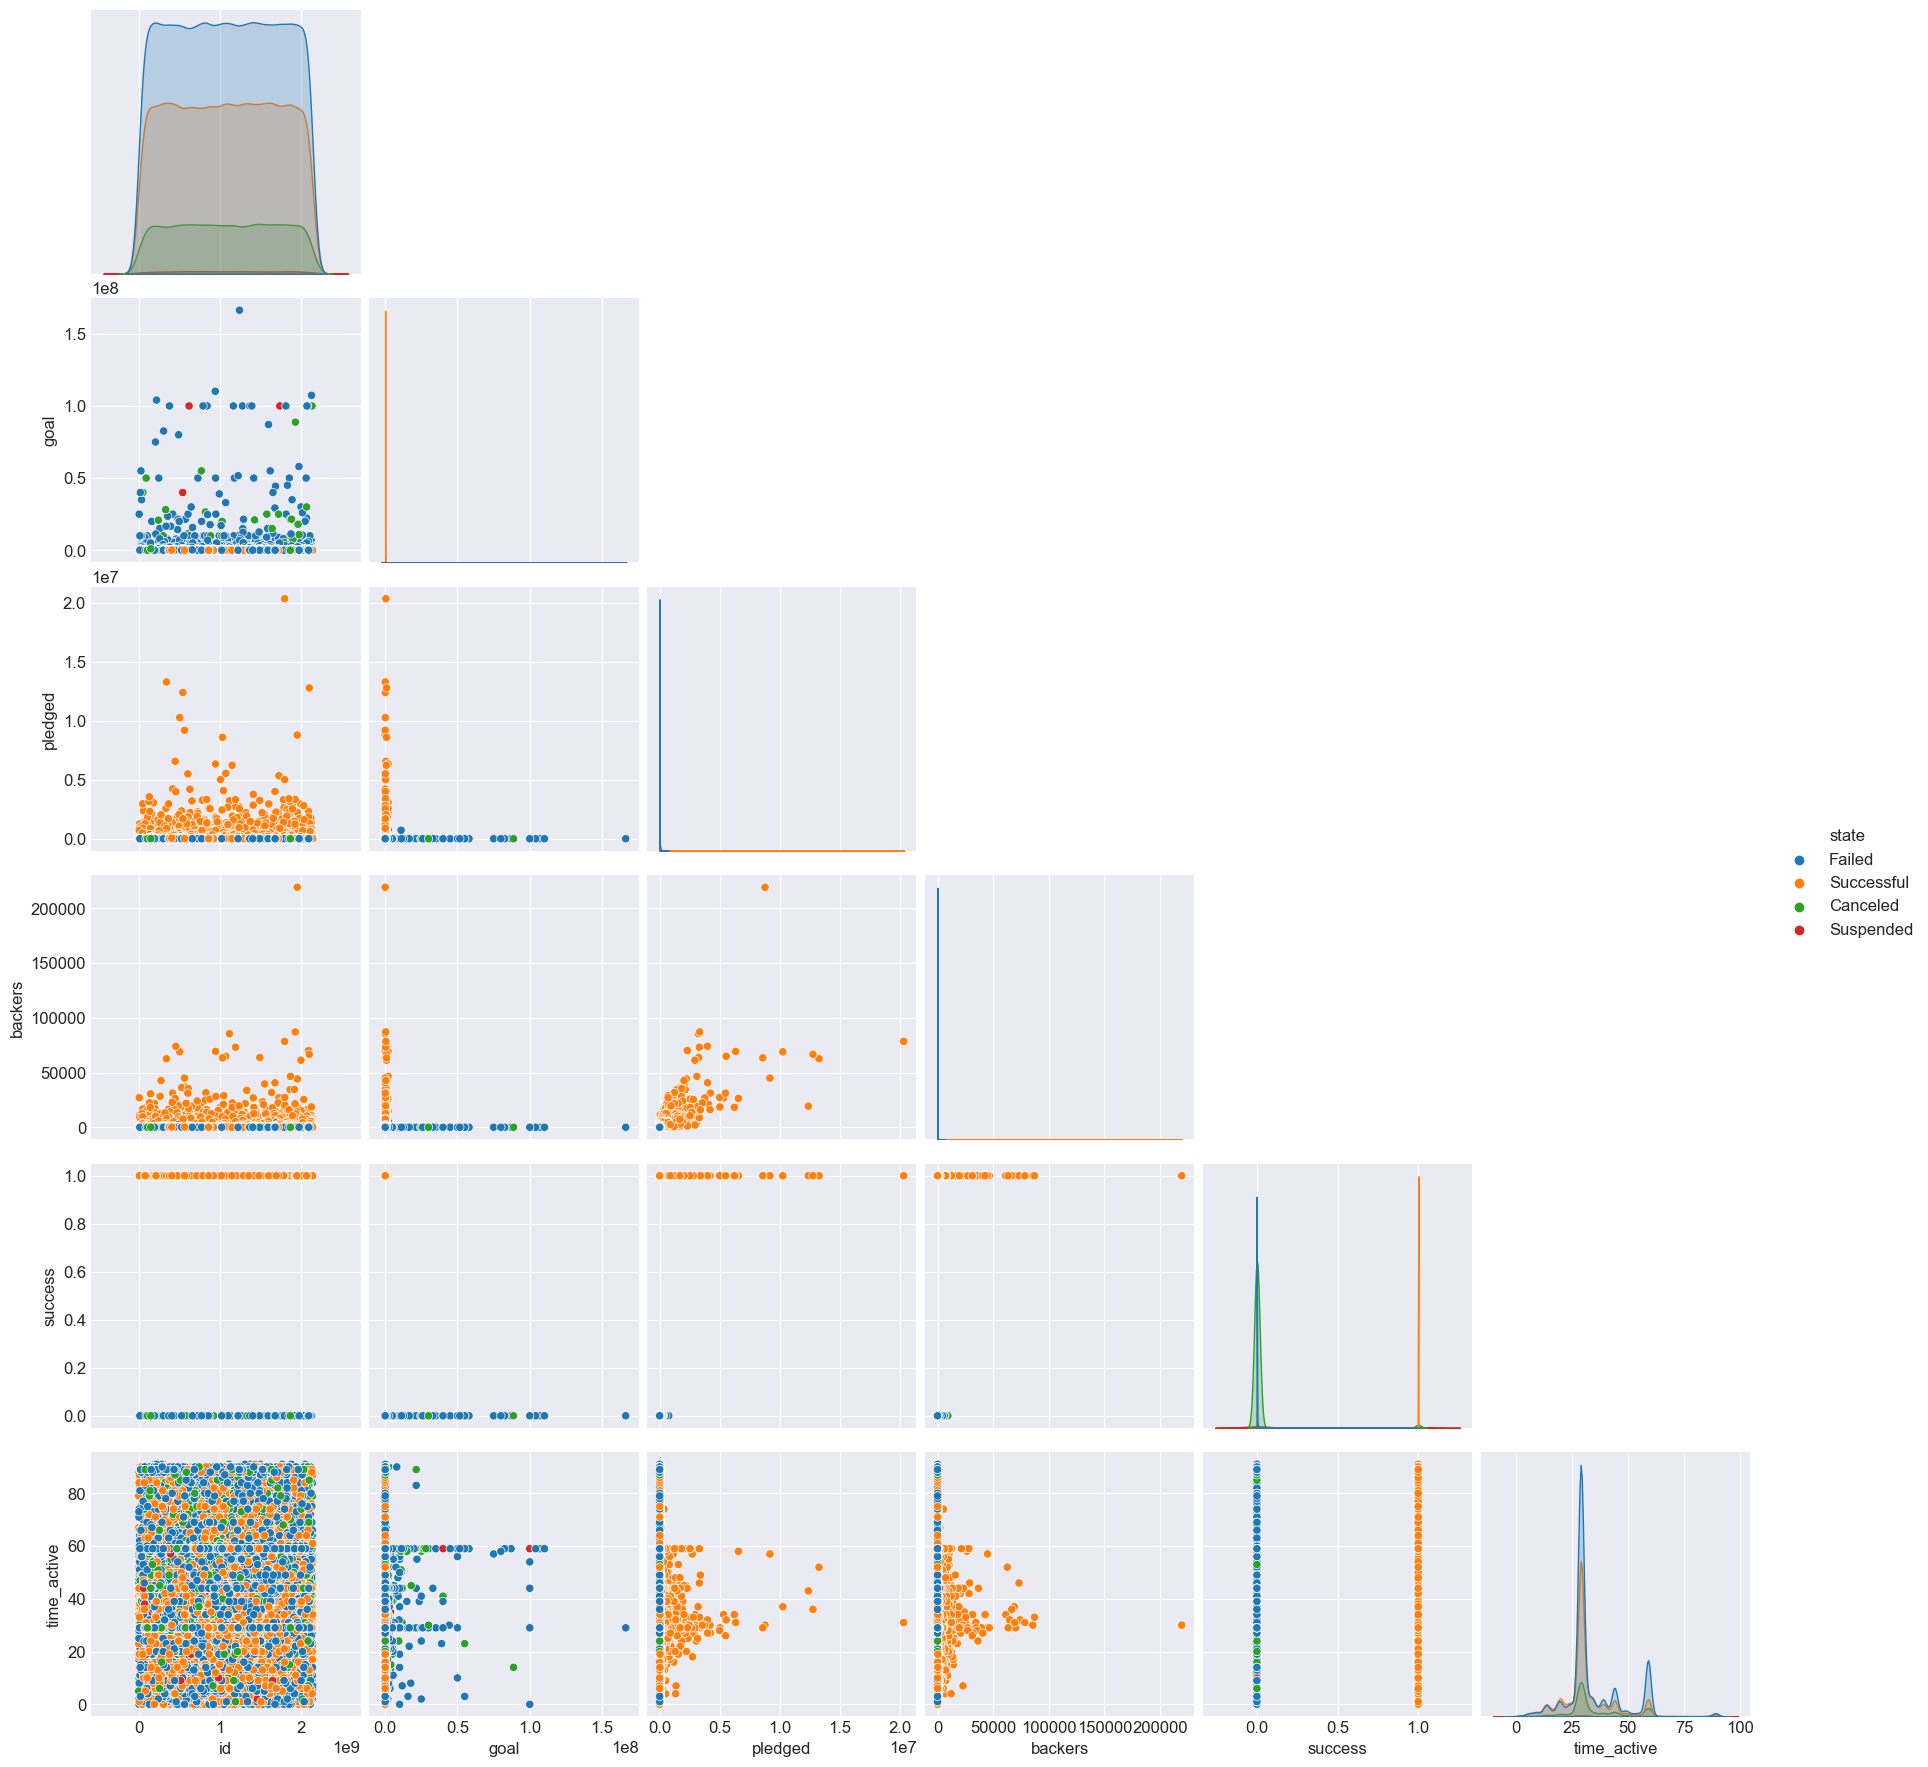

In [86]:
sns.pairplot(df, hue="state", height=3,corner=True);

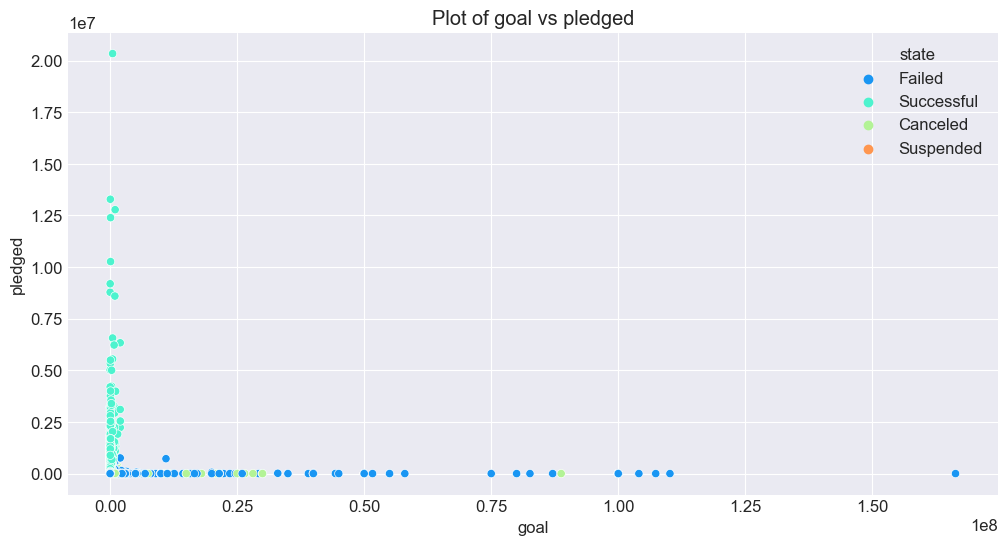

In [87]:
plot.scatter(df ,'goal', 'pledged', 'state', "goal", "pledged")
#Higher goals are Cancelled or Unsucessful

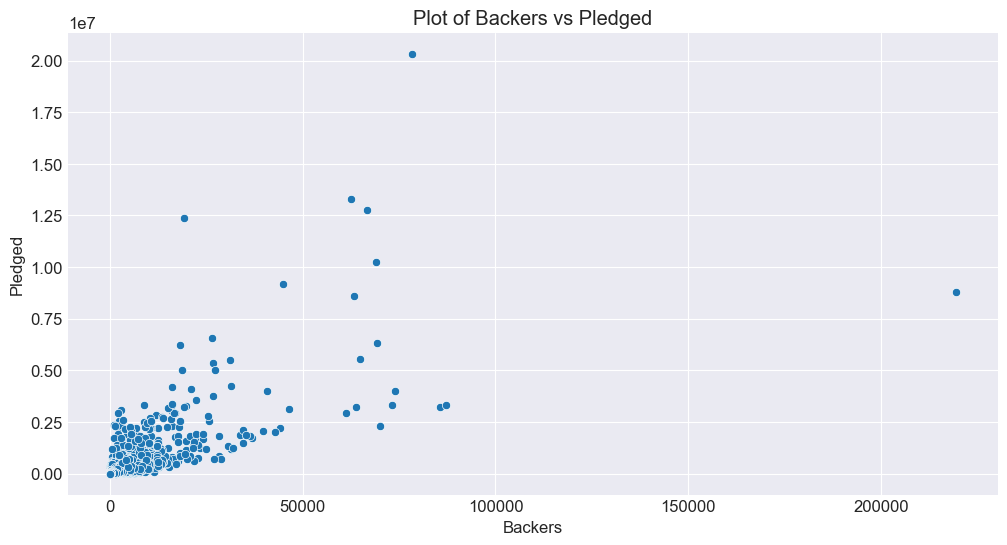

In [88]:
plot.scatter(df ,'backers', 'pledged')

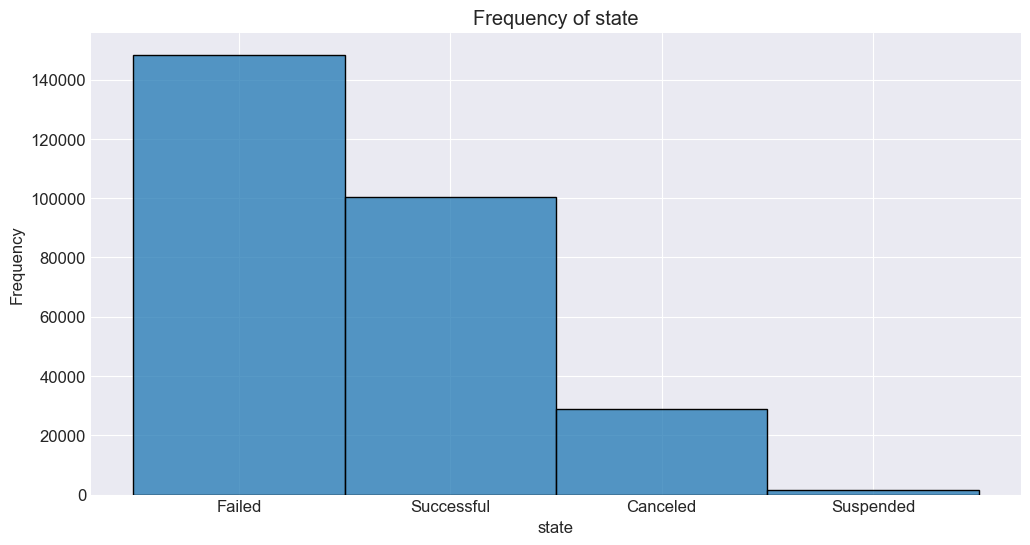

In [89]:
plot.histogram(df,'state', 'state')

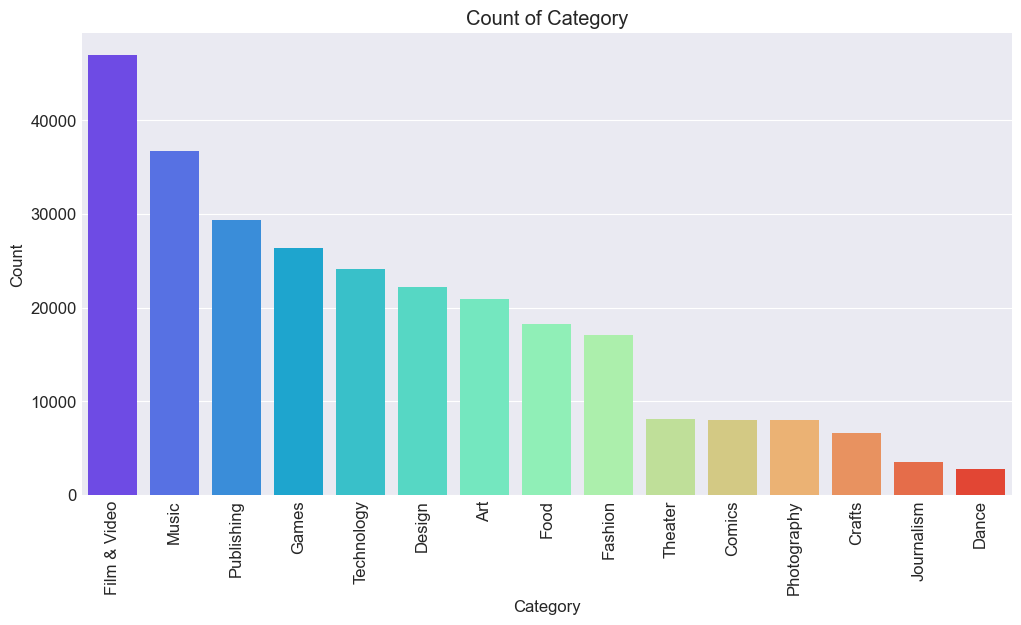

In [90]:
# explore categories split
plot.countplot(df, x="category", xtitle="Category")

In [91]:
pd.set_option('display.max_rows', None)
pd.crosstab(df['subcategory'], df['category'])

category,Art,Comics,Crafts,Dance,Design,Fashion,Film & Video,Food,Games,Journalism,Music,Photography,Publishing,Technology,Theater
subcategory,,,,,,,,,,,,,,,
3D Printing,0,0,0,0,0,0,0,0,0,0,0,0,0,500,0
Academic,0,0,0,0,0,0,0,0,0,0,0,0,664,0,0
Accessories,0,0,0,0,0,2332,0,0,0,0,0,0,0,0,0
Action,0,0,0,0,0,0,528,0,0,0,0,0,0,0,0
Animals,0,0,0,0,0,0,0,0,0,0,0,197,0,0,0
Animation,0,0,0,0,0,0,1925,0,0,0,0,0,0,0,0
Anthologies,0,311,0,0,0,0,0,0,0,0,0,0,285,0,0
Apparel,0,0,0,0,0,5369,0,0,0,0,0,0,0,0,0
Apps,0,0,0,0,0,0,0,0,0,0,0,0,0,4695,0


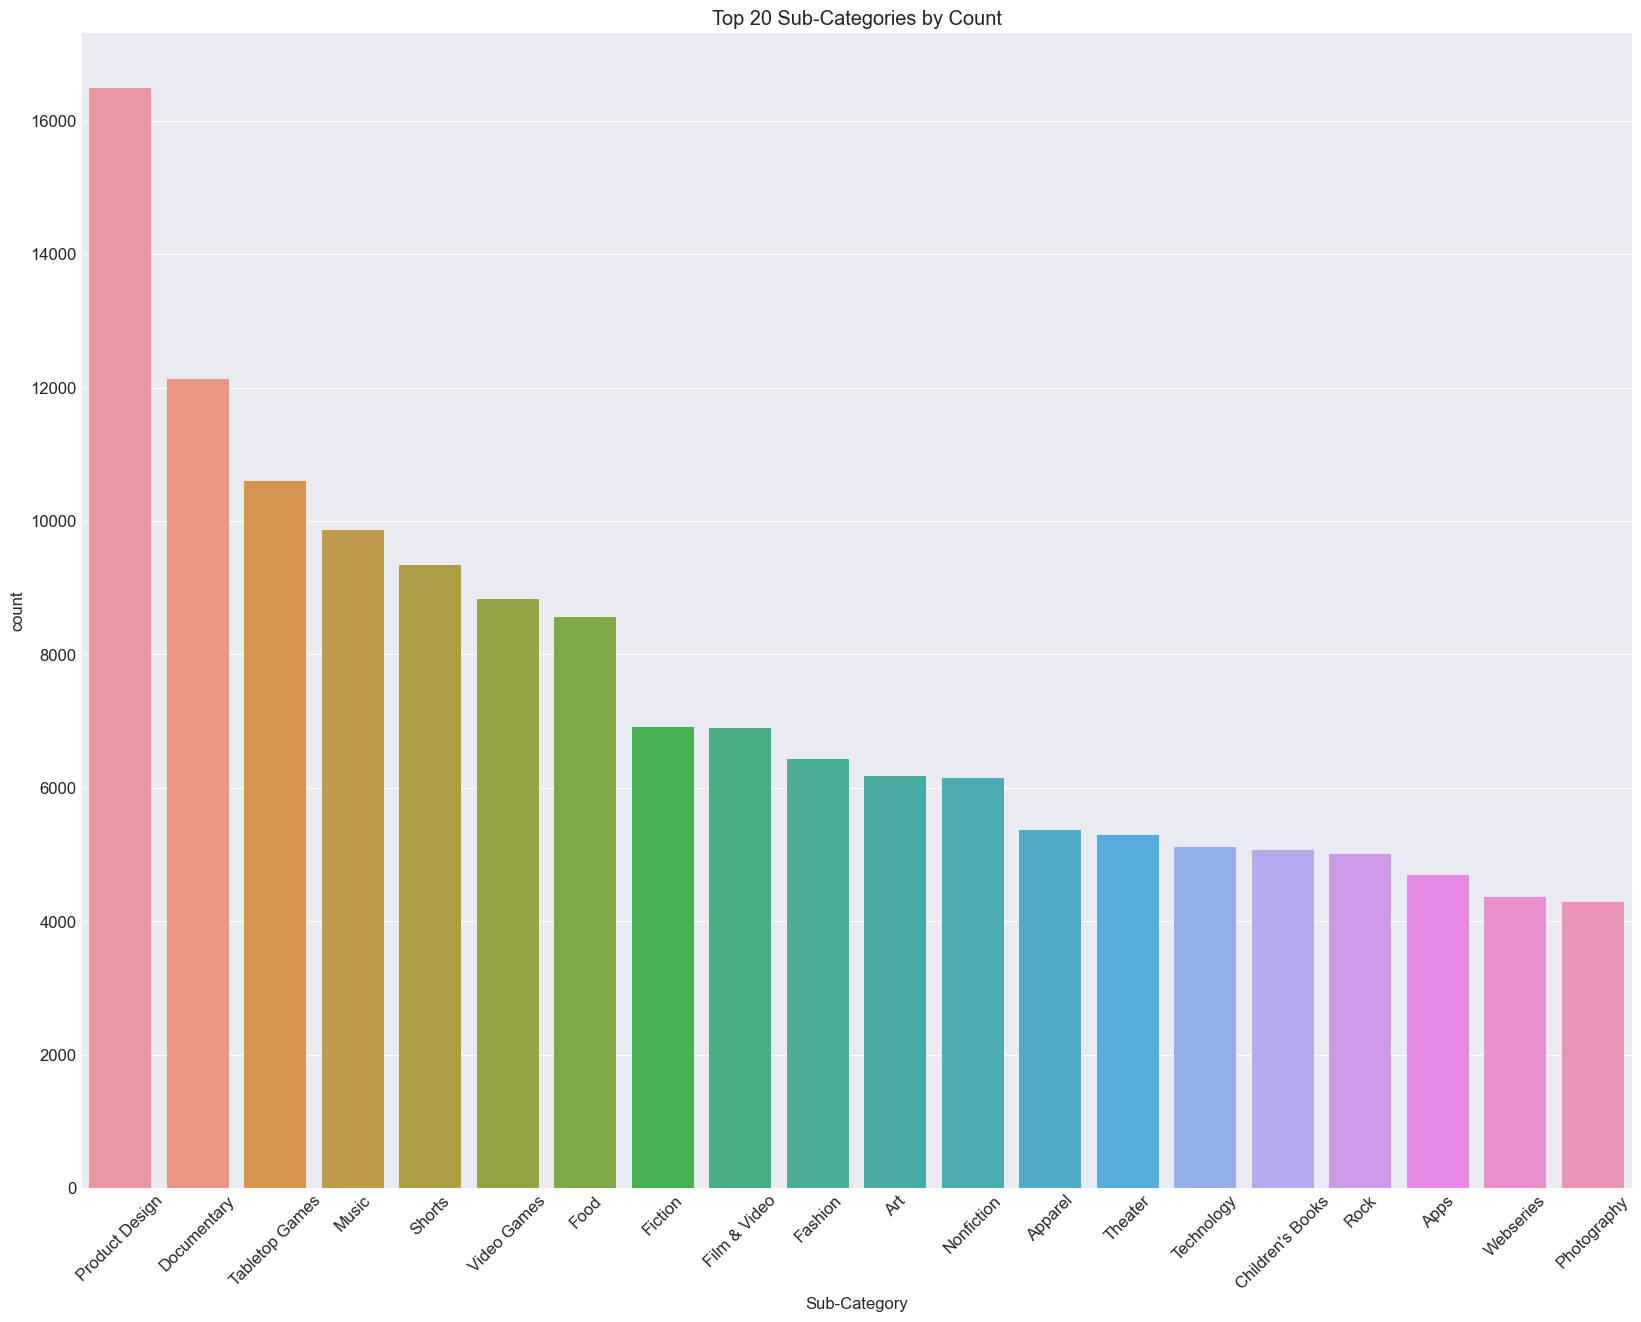

In [92]:
subcategory_counts = df['subcategory'].value_counts()

# Step 2: Identify top 20 subcategories
top_20_subcategories = subcategory_counts.head(20).index

# Step 3: Filter the DataFrame
df_top_20 = df[df['subcategory'].isin(top_20_subcategories)]

# Step 4: Plot
plt.figure(figsize=(20, 15))
sns.countplot(data=df_top_20, x='subcategory', order=top_20_subcategories)
plt.xticks(rotation=45)
plt.xlabel('Sub-Category')
plt.title('Top 20 Sub-Categories by Count')
plt.show()

In [93]:
# Create a crosstab
pd.crosstab(df['category'], df['state'])

state,Canceled,Failed,Successful,Suspended
category,,,,
Art,1652,10611,8567,77
Comics,620,3050,4358,20
Crafts,660,4263,1611,56
Dance,124,943,1743,9
Design,3055,11118,7895,181
Fashion,1973,10752,4224,106
Film & Video,4352,24693,17823,88
Food,1635,11954,4518,110
Games,4657,12068,9426,163


Chi-square statistic: 15771.580277323947
P-value: 0.0
Degrees of freedom: 42


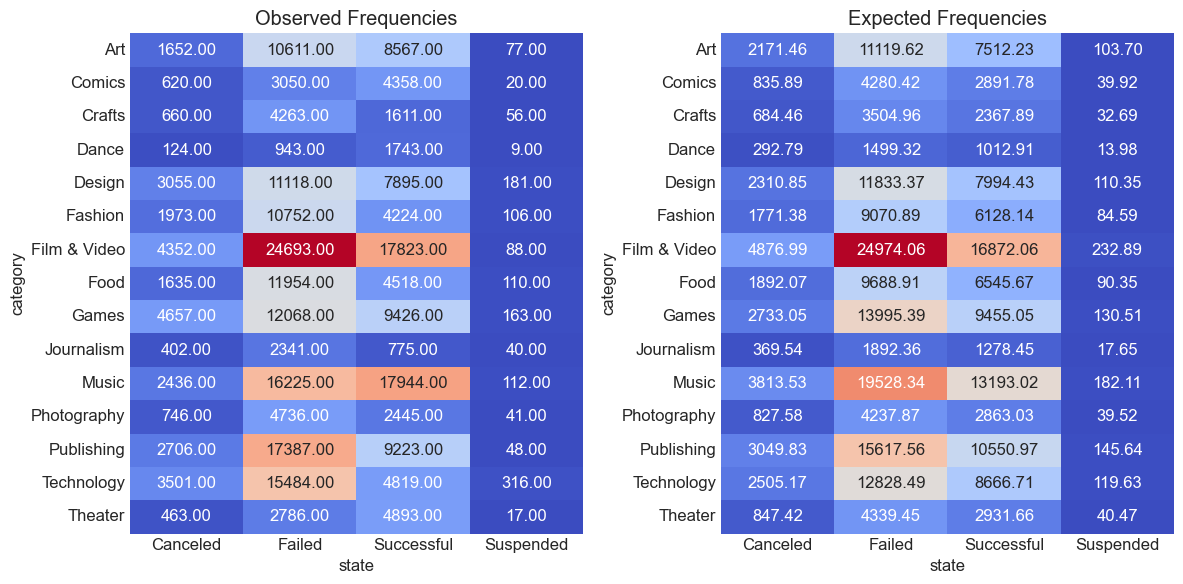

In [94]:
from scipy.stats import chi2_contingency
# Create a crosstab
crosstab = pd.crosstab(df['category'], df['state'])

# Perform chi-square test
chi2, p, dof, ex = chi2_contingency(crosstab)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
#print("Expected frequencies:", ex)

# Convert expected frequencies to DataFrame for easier plotting
expected_df = pd.DataFrame(ex, index=crosstab.index, columns=crosstab.columns)

# Format annotations to avoid scientific notation
def format_annotation(val):
    return f"{val:.2f}"

# Plot the observed frequencies
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(crosstab, annot=crosstab.applymap(format_annotation), fmt='', cmap='coolwarm', cbar=False)
plt.title('Observed Frequencies')

# Plot the expected frequencies
plt.subplot(1, 2, 2)
sns.heatmap(expected_df, annot=expected_df.applymap(format_annotation), fmt='', cmap='coolwarm', cbar=False)
plt.title('Expected Frequencies')

plt.tight_layout()
plt.show()

state           Canceled  Failed  Successful  Suspended   Total  Success Rate
country                                                                      
Australia            798    3457        1500         69    5824      0.257555
Austria               66     273          71          2     412      0.172330
Belgium               56     287         118          7     468      0.252137
Canada              1597    6225        3132         88   11042      0.283644
Denmark              128     442         248         11     829      0.299156
France               275    1213         681         13    2182      0.312099
Germany              456    1834         695         29    3014      0.230591
Hong Kong             64     188         165         12     429      0.384615
Ireland               87     362         157          4     610      0.257377
Italy                298    1466         323         20    2107      0.153299
Japan                  6      11           7          0      24 

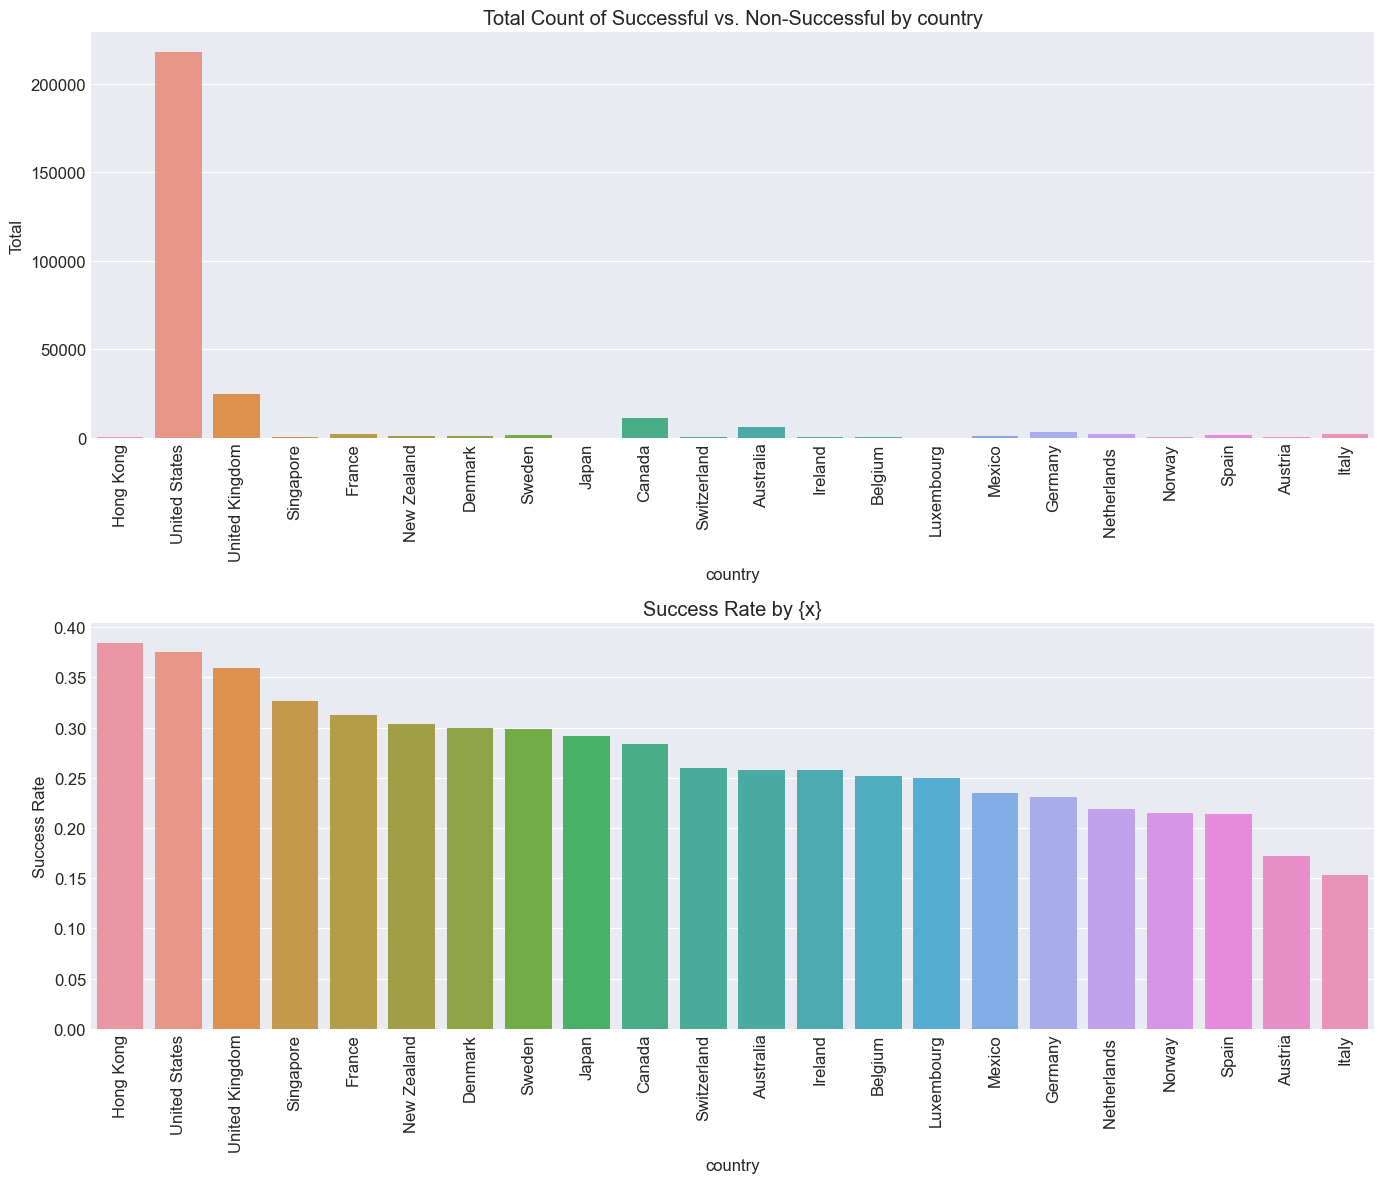

In [95]:
plot.bar_count_percent(df, 'country', 'state')

state         Canceled  Failed  Successful  Suspended  Total  Success Rate
category                                                                  
Art               1652   10611        8567         77  20907      0.409767
Comics             620    3050        4358         20   8048      0.541501
Crafts             660    4263        1611         56   6590      0.244461
Dance              124     943        1743          9   2819      0.618304
Design            3055   11118        7895        181  22249      0.354847
Fashion           1973   10752        4224        106  17055      0.247669
Film & Video      4352   24693       17823         88  46956      0.379568
Food              1635   11954        4518        110  18217      0.248010
Games             4657   12068        9426        163  26314      0.358212
Journalism         402    2341         775         40   3558      0.217819
Music             2436   16225       17944        112  36717      0.488711
Photography        746   

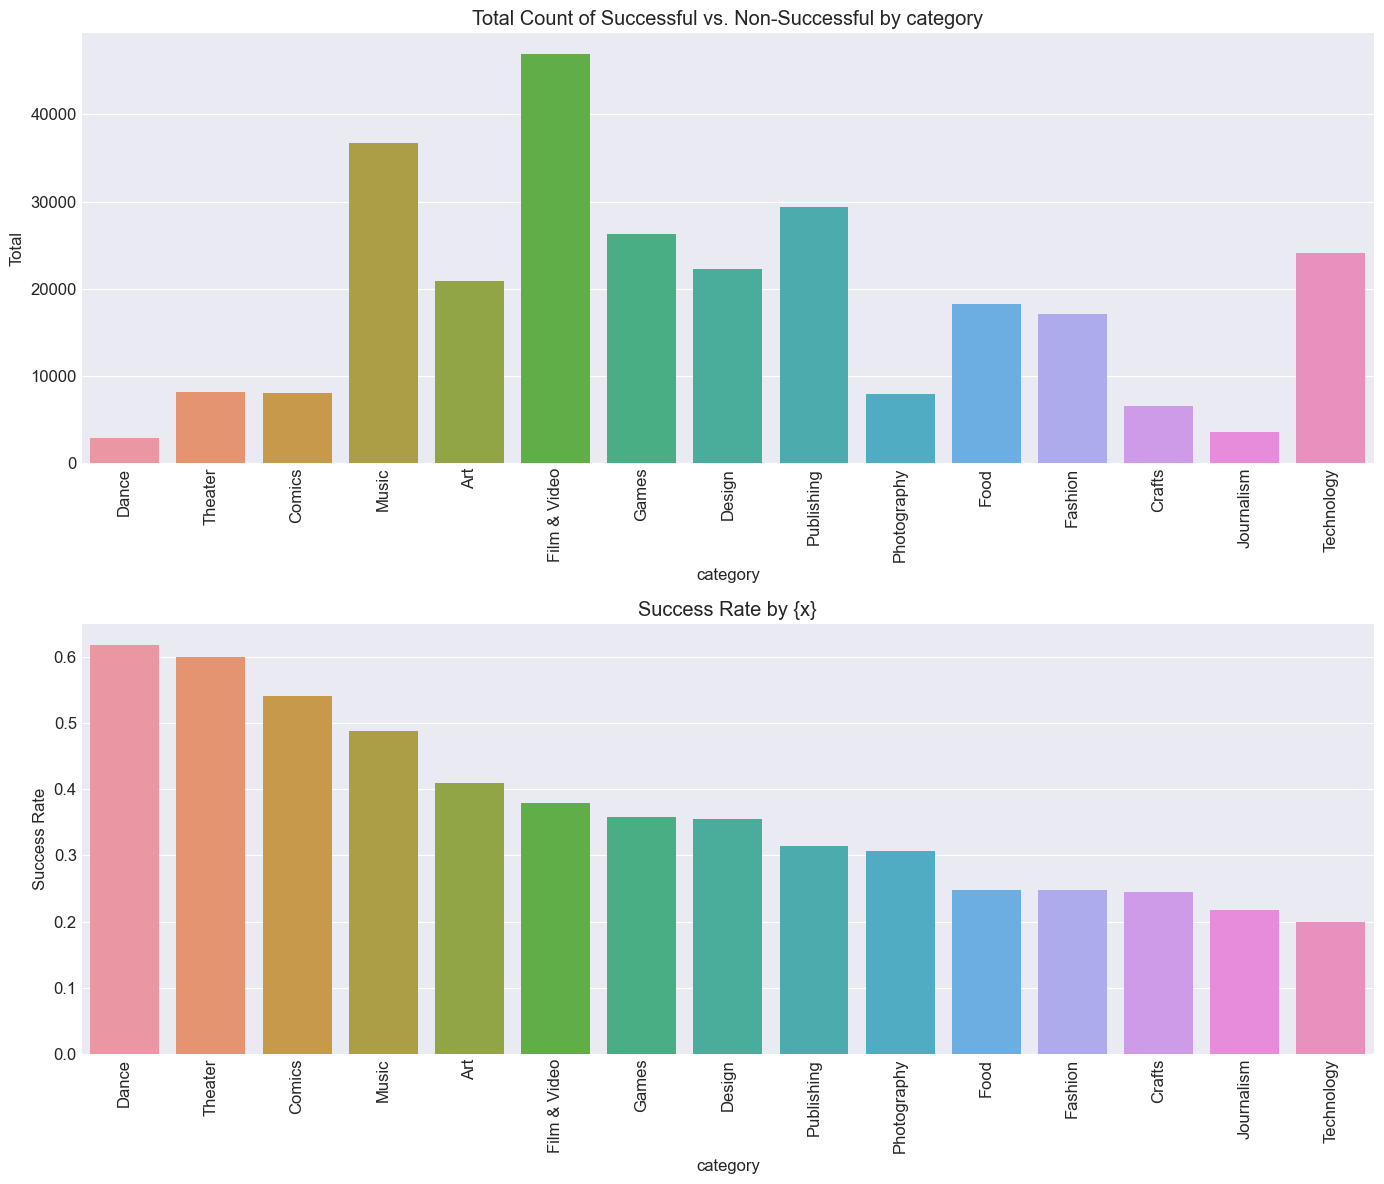

In [96]:
plot.bar_count_percent(df, 'category', 'state')

# Defining baseline model

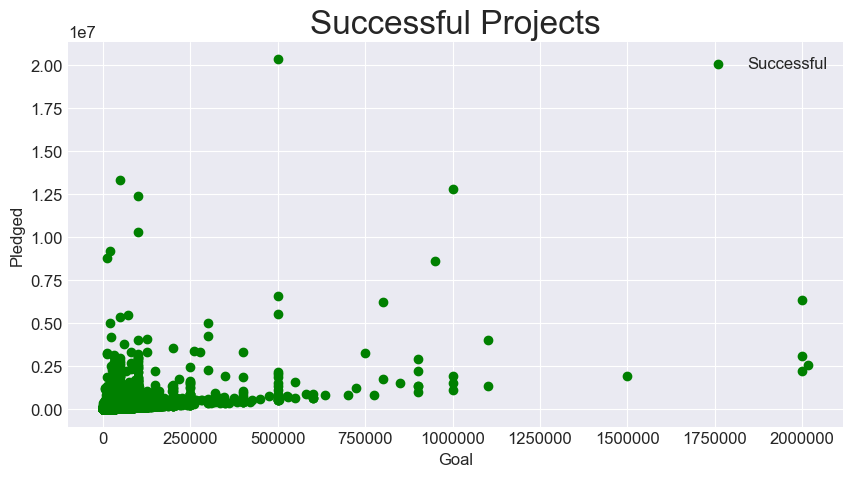

In [97]:
# Checking Goal of successful projects
df_success = df[df["state"] == 'Successful']
df_fail = df[df["state"] != 'Successful']
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(x = df_success.goal, y = df_success.pledged, marker = 'o', color='green', label = 'Successful')
#ax.scatter(x = df_fail.goal, y = df_fail.pledged, marker = 'x', color='red', label = 'Fail')
ax.set_title(label='Successful Projects',fontsize=24)


ax.set_xlabel(xlabel = "Goal")
ax.set_ylabel(ylabel = "Pledged")
plt.style.use('seaborn-v0_8-darkgrid')

# Set the x-axis limit from 0 to 100,000
#ax.set_xlim(0, 1000000)
ax.ticklabel_format(style='plain', axis='x')

plt.legend()

plt.show()

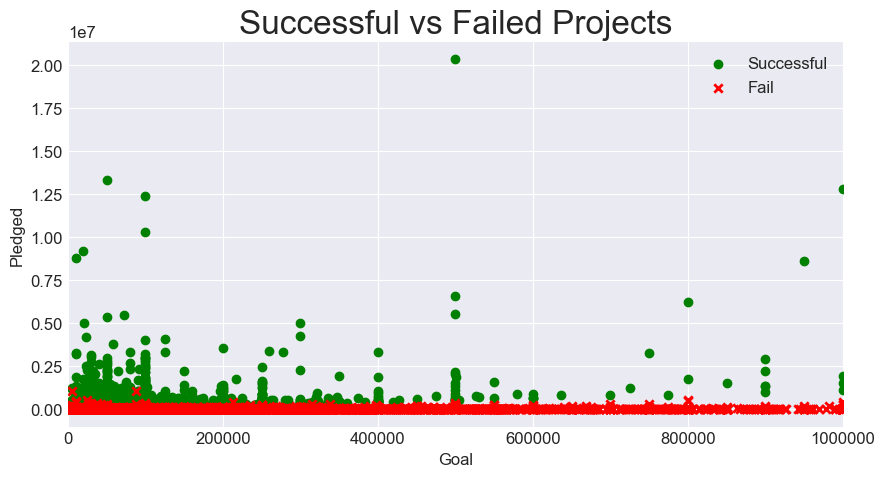

In [98]:
# As most successful project have a Goal under $1,000,000, checking failed and successful projects in this range
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(x = df_success.goal, y = df_success.pledged, marker = 'o', color='green', label = 'Successful')
ax.scatter(x = df_fail.goal, y = df_fail.pledged, marker = 'x', color='red', label = 'Fail')
ax.set_title(label='Successful vs Failed Projects',fontsize=24)


ax.set_xlabel(xlabel = "Goal")
ax.set_ylabel(ylabel = "Pledged")
plt.style.use('seaborn-v0_8-darkgrid')

# Set the x-axis limit from 0 to 100,000
ax.set_xlim(0, 1000000)
ax.ticklabel_format(style='plain', axis='x')

plt.legend()

plt.show()

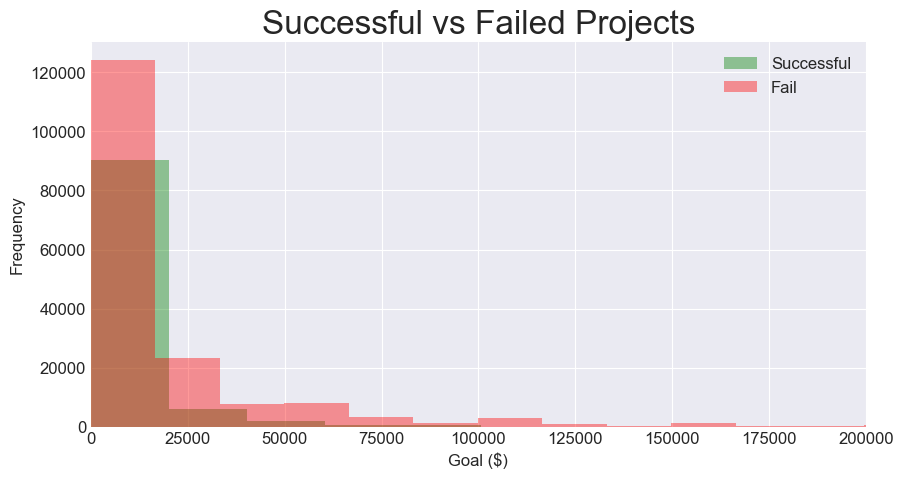

In [99]:
# Create histogram to check further the distribution between successful and failed projects
fig, ax = plt.subplots(figsize = (10,5))
ax.hist(df_success.goal, color='green', label = 'Successful', bins=100, alpha=0.4)
ax.hist(df_fail.goal, color='red', label = 'Fail', bins=10000, alpha=0.4)
ax.set_title(label='Successful vs Failed Projects',fontsize=24)

ax.set_xlabel(xlabel = "Goal ($)")
ax.set_ylabel(ylabel = "Frequency")
plt.style.use('seaborn-v0_8-darkgrid')

# Set the x-axis limit from 0 to 100,000
ax.set_xlim(0, 200000)
ax.ticklabel_format(style='plain', axis='x')

plt.legend()

plt.show()

As we can see above, most successful projects have a Goal below $20,000.
Let's check further the categories and countries of successful and failed projects under $20,000

In [100]:
#Checking most successful countries with goal <= 20000
df_under_20k = df.copy()#df.query("goal <= 20000 ")
df_under_20k.shape

# Create crosstab 
crosstab = pd.crosstab(index=df_under_20k['country'], columns=df_under_20k['state'], values=df_under_20k['state'], aggfunc='count', dropna=False).fillna(0)

# Calculate success rate
crosstab['Success Rate'] = round(crosstab['Successful'] / (crosstab['Successful'] + crosstab['Failed']+ crosstab['Suspended'] + crosstab['Canceled']),2)

print(crosstab)

successful_countries = crosstab[crosstab['Success Rate'] > 0.25].index.to_list()
successful_countries



state           Canceled    Failed  Successful  Suspended  Success Rate
country                                                                
Australia          798.0    3457.0      1500.0       69.0          0.26
Austria             66.0     273.0        71.0        2.0          0.17
Belgium             56.0     287.0       118.0        7.0          0.25
Canada            1597.0    6225.0      3132.0       88.0          0.28
Denmark            128.0     442.0       248.0       11.0          0.30
France             275.0    1213.0       681.0       13.0          0.31
Germany            456.0    1834.0       695.0       29.0          0.23
Hong Kong           64.0     188.0       165.0       12.0          0.38
Ireland             87.0     362.0       157.0        4.0          0.26
Italy              298.0    1466.0       323.0       20.0          0.15
Japan                6.0      11.0         7.0        0.0          0.29
Luxembourg           4.0      32.0        12.0        0.0       

['Australia',
 'Canada',
 'Denmark',
 'France',
 'Hong Kong',
 'Ireland',
 'Japan',
 'New Zealand',
 'Singapore',
 'Sweden',
 'Switzerland',
 'United Kingdom',
 'United States']

In [101]:
# Checking most successful categories
# Create crosstab 
crosstab = pd.crosstab(index=df_under_20k['category'], columns=df_under_20k['state'], values=df_under_20k['state'], aggfunc='count', dropna=False).fillna(0)

# Calculate success rate
crosstab['Success Rate'] = round(crosstab['Successful'] / (crosstab['Successful'] + crosstab['Failed']+ crosstab['Suspended'] + crosstab['Canceled']),2)

print(crosstab)

successful_categories = crosstab[crosstab['Success Rate'] > 0.25].index.to_list()
successful_categories

state         Canceled  Failed  Successful  Suspended  Success Rate
category                                                           
Art               1652   10611        8567         77          0.41
Comics             620    3050        4358         20          0.54
Crafts             660    4263        1611         56          0.24
Dance              124     943        1743          9          0.62
Design            3055   11118        7895        181          0.35
Fashion           1973   10752        4224        106          0.25
Film & Video      4352   24693       17823         88          0.38
Food              1635   11954        4518        110          0.25
Games             4657   12068        9426        163          0.36
Journalism         402    2341         775         40          0.22
Music             2436   16225       17944        112          0.49
Photography        746    4736        2445         41          0.31
Publishing        2706   17387        9223      

['Art',
 'Comics',
 'Dance',
 'Design',
 'Film & Video',
 'Games',
 'Music',
 'Photography',
 'Publishing',
 'Theater']

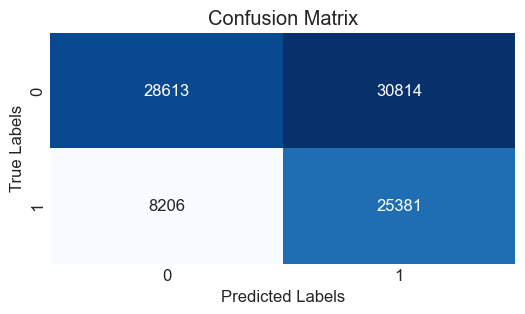

--------------------------------------------------------------------------------
Accuracy Score :  0.58  Precision Score :  0.45  Recall Score :  0.76 , F1 Score :  0.57
--------------------------------------------------------------------------------



----------------  Classification Report  ----------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.48      0.59     59427
           1       0.45      0.76      0.57     33587

    accuracy                           0.58     93014
   macro avg       0.61      0.62      0.58     93014
weighted avg       0.66      0.58      0.58     93014



In [102]:
# Defining Baseline model
def baseline_model(df:pd.DataFrame):
    """Educated guess"""
    y_pred = [1 if row['goal'] <= 20000 and row['country'] in successful_countries and row['category'] in successful_categories else 0 for index, row in df.iterrows()]
    return y_pred

X_train, X_test, y_train, y_test = split_train_test(data, 'state')
y_test = (y_test == 'Successful').astype(int)
y_pred = baseline_model(X_test)

plot.evaluation_metric(y_test, y_pred)